<a href="https://colab.research.google.com/github/Gilf641/Graduate-Admissions-Analysis/blob/master/Graduate_Admissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Load all the required libraries

import pandas as pd
import numpy as np

# for data visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

# for advanced visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


In [4]:

# mount the dataset from local drive
from google.colab import files
uploaded = files.upload()

import io
df2 = pd.read_csv(io.BytesIO(uploaded['Admission_Predict.csv']))


Saving Admission_Predict.csv to Admission_Predict (2).csv


In [5]:
df = df2
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# Summarize the data
df.describe()

# checking if the data contains any null values
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
# Data Analysis

_gre = df['GRE Score'].mean()
_toefl = df['TOEFL Score'].mean()
_cgpa = df['CGPA'].mean()

# _sop = np.round(data['SOP'].mean())
# _lor = np.round(data['LOR '].mean())

# contains all the column names present in the dataframe
df_tuple = df.columns


# Function to find mean, max and min values of the variables packed in one

def mean_max_min(tuple_containing_columns, mode):
  _dict1 = {}
  if mode == 'mean':
    for i in tuple_containing_columns:
      _dict1[i] = round(df[str(i)].mean(),3) 
  elif mode == 'max':
    for i in tuple_containing_columns:
      _dict1[i] = round(df[str(i)].max(),3) 
  elif mode == 'min':
    for i in tuple_containing_columns:
      _dict1[i] = round(df[str(i)].min(),3) 
  
  return _dict1


# Find the average, max & min values of GRE, TOEFL, LOR, CGPA etc

measures = ('mean', 'max', 'min')
for i in measures:
  print(i+' values:')
  print(mean_max_min(df_tuple[1:],  str(i)))
  print('.'*17)

mean values:
{'GRE Score': 316.808, 'TOEFL Score': 107.41, 'University Rating': 3.087, 'SOP': 3.4, 'LOR ': 3.453, 'CGPA': 8.599, 'Research': 0.547, 'Chance of Admit ': 0.724}
.................
max values:
{'GRE Score': 340, 'TOEFL Score': 120, 'University Rating': 5, 'SOP': 5.0, 'LOR ': 5.0, 'CGPA': 9.92, 'Research': 1, 'Chance of Admit ': 0.97}
.................
min values:
{'GRE Score': 290, 'TOEFL Score': 92, 'University Rating': 1, 'SOP': 1.0, 'LOR ': 1.0, 'CGPA': 6.8, 'Research': 0, 'Chance of Admit ': 0.34}
.................


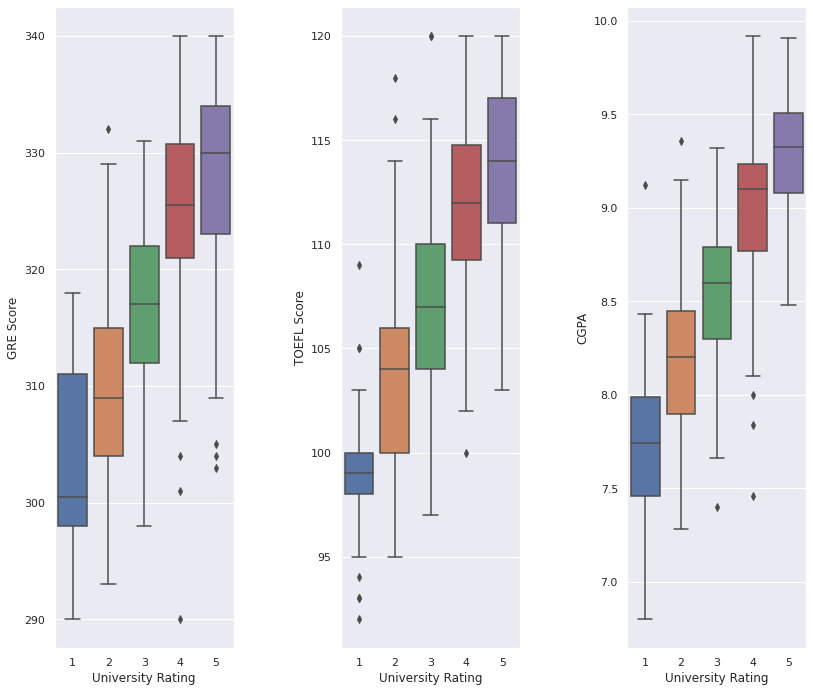

In [11]:
# Data Visualizations

f, axes = plt.subplots(1, 3) # IDK about this
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=None) # subplot parameters


sns.set(rc={'figure.figsize':(12,8)}) # sets up the graph size


sns.boxplot( df['University Rating'], df['GRE Score'], orient = 'v', ax = axes[0]) # creates boxplot
sns.boxplot( df['University Rating'], df['TOEFL Score'], orient = 'v', ax = axes[1])
sns.boxplot(df['University Rating'], df['CGPA'], orient = 'v', ax = axes[2])

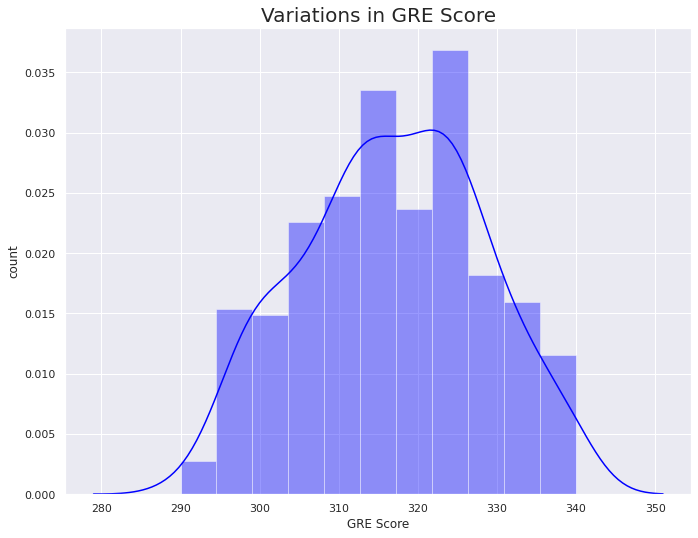

In [15]:

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,8)
# plt.style.use('_classic_test')

sns.distplot(df['GRE Score'], color = 'blue')
plt.title('Variations in GRE Score', fontsize = 20)
plt.xlabel('GRE Score')
plt.ylabel('count')
plt.show()



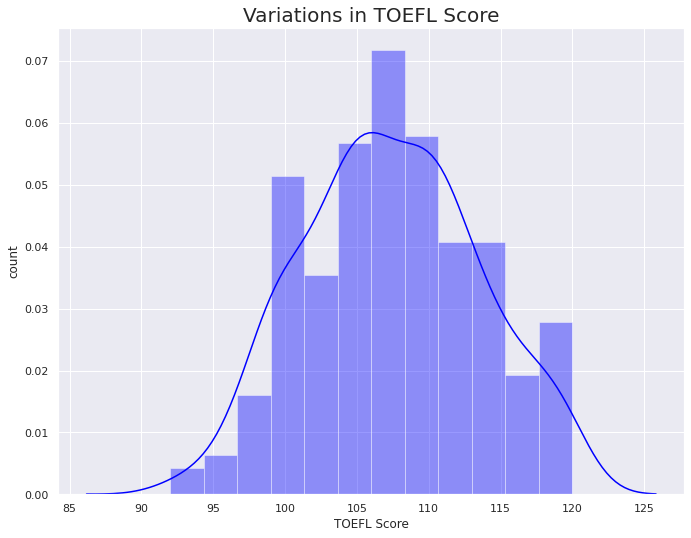

In [32]:
plt.rcParams['figure.figsize'] = (10,8)


sns.distplot(df['TOEFL Score'], color = 'blue')
plt.title('Variations in TOEFL Score', fontsize = 20)
plt.xlabel('TOEFL Score')
plt.ylabel('count')
plt.show()



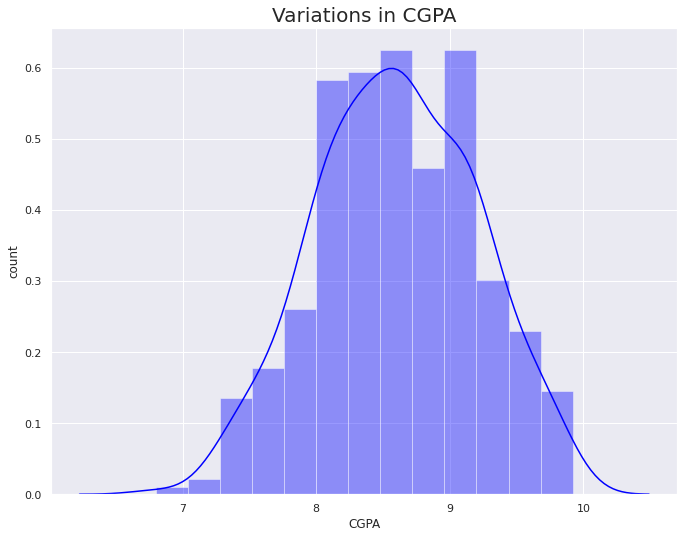

In [17]:
plt.rcParams['figure.figsize'] = (10,8)

sns.distplot(df['CGPA'], color = 'blue')
plt.title('Variations in CGPA', fontsize = 20)
plt.xlabel('CGPA')
plt.ylabel('count')
plt.show()

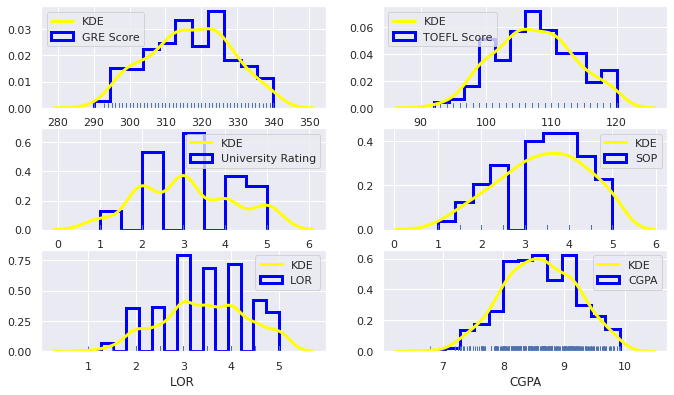

In [31]:
# Code Snippet for sns.distplot in facet.grid style

i = 0

for item in df.columns[1:-2]:
    i += 1
    plt.subplot(, 2, i)
    sns.distplot(df[item], rug=True, rug_kws={"color": "b"},kde=True,
                 kde_kws={"color": "yellow", "lw": 3, "label": "KDE"},
                 hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "blue"},label="{0}".format(item))
plt.show()

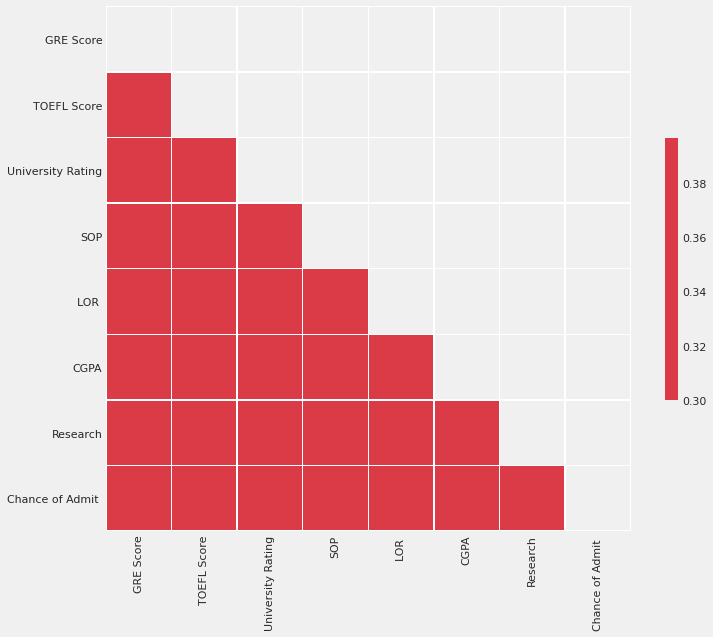

In [39]:
# Correlation analysis

# remove Serial No

df_corr = df.drop('Serial No.', 1)

corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

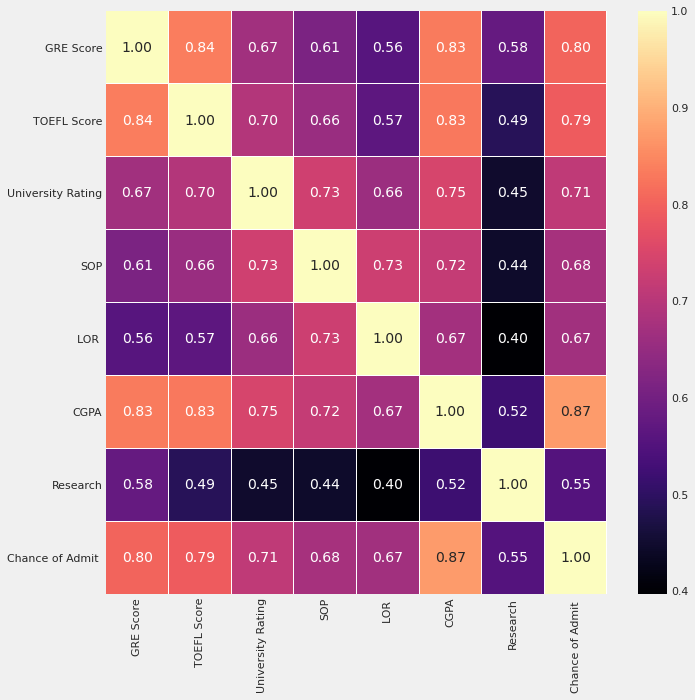

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [41]:
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

# Insights 
'''
Chances of Admit mainly depend on GRE, TOEFL Score and apart from that University Rating, SOP & LOR add some weightage
'''

df_corr.corr()


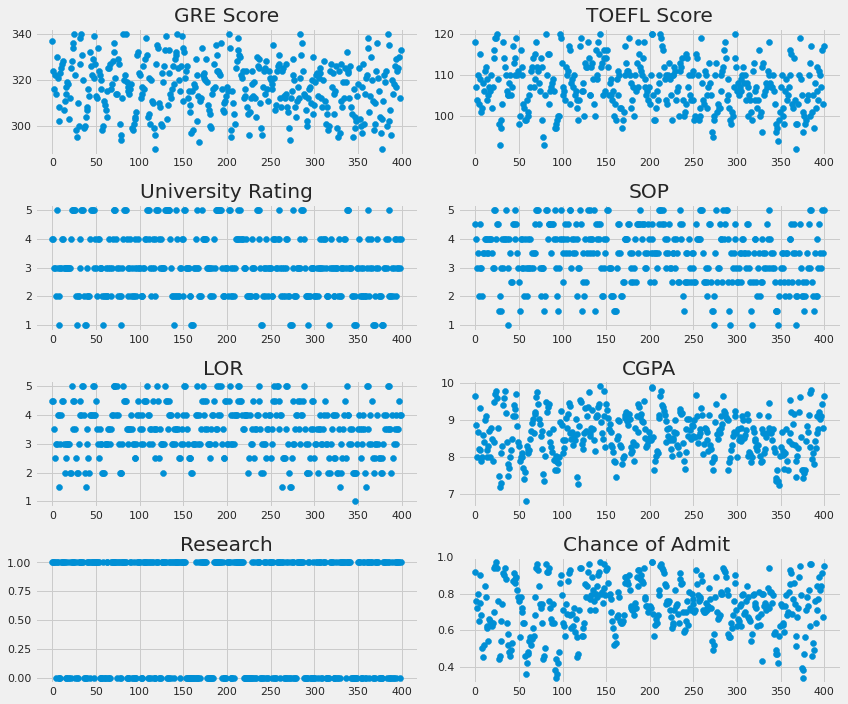

In [48]:
# Code Snippet for scatter plots

for i, col in enumerate(df_corr.columns):   
    plt.subplot(4,2,i+1)
    plt.scatter(np.arange(0,400),df_corr[col].values.tolist())
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12, 10)
    plt.tight_layout()
plt.show()

<Figure size 1008x1008 with 0 Axes>

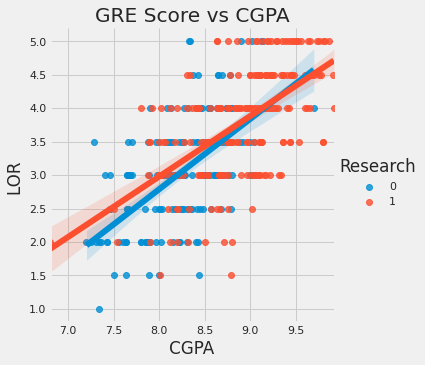

In [53]:
plt.figure(figsize = (14,14))

fig = sns.lmplot(x="CGPA", y="LOR ", data=df_corr, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()


# This actually holds true
# Students with good CGPA will have a real zeal in what they are studying and focus on getting into research while 7 and 8 pointers rarely get into that field